# Communicating Data Findings
# Part I - Prosper Loan Data Exploration and Visualization
## By Ayomide (Enoch) Fadeyi

## Introduction
> Introduce the dataset

Prosper Loan Dataset contains information on peer to peer loans facilitated by Prosper, a credit company.
There are 113937 rows/observations and 81 columns/features.


## Preliminary Wrangling


In [48]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. 
Try and motivate your exploration goals through this section.


In [49]:
df = pd.read_csv("C:/Users/USER/Desktop/prosperLoanData.csv")

In [50]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [51]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [53]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [54]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [55]:
df.duplicated

<bound method DataFrame.duplicated of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657

In [56]:
df.duplicated().sum()

0

In [57]:
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [58]:
corr = df.corr()

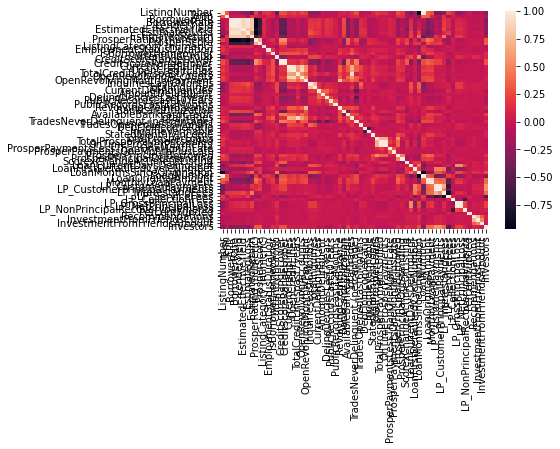

In [59]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [60]:
df.shape

(113937, 81)

In [61]:
df.sample()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
25071,B2D73466054783067C5AA05,430762,2009-10-28 09:09:40.663000000,NaN,36,Chargedoff,2011-06-08 00:00:00,0.14482,0.109,0.099,...,-9.8,0.0,649.24,649.23,0.0,1.0,0,0,0.0,26


### What is the structure of your dataset?

> There are 113937 rows/observations, 81 columns/features.


### What is/are the main feature(s) of interest in your dataset?

> As a result of the large numbers of features in this dataset, 81 in total, I 
will not be able to use all these. I will be focusing on parts of these for the 
purpose of this analysis.

Here, I am trying to figure out what features can be used to predict default on credit. 
Also, I would like to check what are major factors connected with prosper credit rating.
The features I am interested in working with are as follow:

Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), 
EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, 
LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think borrower's rate will have an impact on the chances of default on credit 
and repayment. Also, the amount of loan collected and total loans given by Prosper
will play key roles in this analysis. Finally, the rating, income, and employment status 
will be very significant in this analysis.

Hence, the features below will help support my investigation into my feature of interest:
Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), 
EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, 
LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors.

In [62]:
target_features =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [63]:
target_features

['Term',
 'LoanStatus',
 'BorrowerRate',
 'ProsperRating (Alpha)',
 'ListingCategory (numeric)',
 'EmploymentStatus',
 'DelinquenciesLast7Years',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'LoanOriginalAmount',
 'LoanOriginationDate',
 'Recommendations',
 'Investors']

In [64]:
target_df = df[target_features]

In [65]:
target_df.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,0,158
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20


In [66]:
target_df.sample(6)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
59734,36,Current,0.3059,HR,1,Employed,0.0,3833.333333,NaN,4000,2013-12-10 00:00:00,0,36
5677,36,Chargedoff,0.1075,NaN,3,Full-time,1.0,6583.333333,NaN,5000,2008-07-31 00:00:00,0,161
90078,36,Current,0.1599,B,1,Employed,0.0,8333.333333,NaN,3100,2011-06-01 00:00:00,0,71
2483,60,Current,0.1400,B,1,Employed,0.0,6500.000000,NaN,8000,2014-02-04 00:00:00,0,1
9778,36,Defaulted,0.3295,NaN,0,NaN,NaN,3500.000000,NaN,2800,2006-03-28 00:00:00,0,34
108211,60,Current,0.1875,C,1,Employed,0.0,6600.000000,NaN,10000,2014-01-06 00:00:00,0,7


In [67]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Recommendations            113937 non-null  int64  
 12  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(5), obje

In [68]:
target_df.describe()

,Term,BorrowerRate,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113937.000000,113937.000000,112947.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.192764,2.774209,4.154984,5.608026e+03,1.421100,8337.01385,0.048027,80.475228
std,10.436212,0.074818,3.996797,10.160216,7.478497e+03,0.764042,6245.80058,0.332353,103.239020
min,12.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.134000,1.000000,0.000000,3.200333e+03,1.000000,4000.00000,0.000000,2.000000
50%,36.000000,0.184000,1.000000,0.000000,4.666667e+03,1.000000,6500.00000,0.000000,44.000000
75%,36.000000,0.250000,3.000000,3.000000,6.825000e+03,2.000000,12000.00000,0.000000,115.000000
max,60.000000,0.497500,20.000000,99.000000,1.750003e+06,8.000000,35000.00000,39.000000,1189.000000


In [69]:
corr_target = target_df.corr()

In [70]:
corr_target

,Term,BorrowerRate,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
Term,1.000000,0.020085,0.004947,-0.041492,0.028479,0.070311,0.338927,-0.056680,-0.045137
BorrowerRate,0.020085,1.000000,0.102913,0.170279,-0.088982,-0.049270,-0.328960,-0.030579,-0.274217
ListingCategory (numeric),0.004947,0.102913,1.000000,0.016950,0.001599,0.009398,-0.127130,-0.028031,-0.073996
DelinquenciesLast7Years,-0.041492,0.170279,0.016950,1.000000,-0.025805,-0.034269,-0.136667,0.006495,-0.105479
StatedMonthlyIncome,0.028479,-0.088982,0.001599,-0.025805,1.000000,0.027344,0.201259,-0.018996,0.076244
TotalProsperLoans,0.070311,-0.049270,0.009398,-0.034269,0.027344,1.000000,0.066521,0.054959,-0.035074
LoanOriginalAmount,0.338927,-0.328960,-0.127130,-0.136667,0.201259,0.066521,1.000000,-0.018190,0.380093
Recommendations,-0.056680,-0.030579,-0.028031,0.006495,-0.018996,0.054959,-0.018190,1.000000,0.073824
Investors,-0.045137,-0.274217,-0.073996,-0.105479,0.076244,-0.035074,0.380093,0.073824,1.000000


In [71]:
target_df.isna().sum()

Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
EmploymentStatus              2255
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
TotalProsperLoans            91852
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

In [72]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [73]:
#Convert LoanOriginationDate to datetime datatype
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])

In [74]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

In [75]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   TotalProsperLoans          84853 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Reco

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


# Loan status

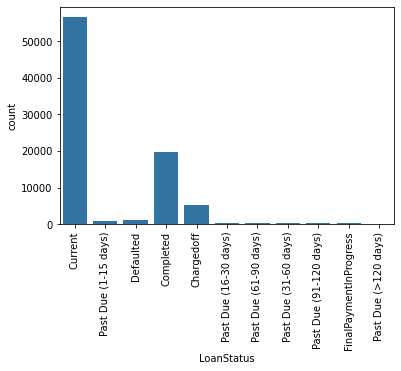

In [76]:
# setting color
base_color = sns.color_palette()[0]
plt.xticks(rotation=90)
sns.countplot(data = target_df, x = 'LoanStatus', color = base_color);

Observation 1:

Most of the loans in the data set are actually current loans.
Past due loans are split in several groups based on the length of payment delay.
Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount.

# Employment Status

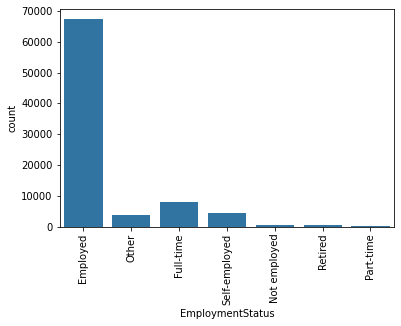

In [77]:
sns.countplot(data = target_df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);

Observation 2:

The majority of borrowers are employed and all other categories as small part of borrowers.
In small Group full time has highest, after that self empolyed are there and so on.

# Stated Monthly Income

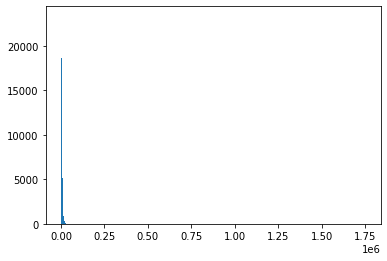

In [78]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);

NB: Distribution of stated monthly income is highly skewed to the right. 
So, we have to check how many outliers are there)


In [79]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

245

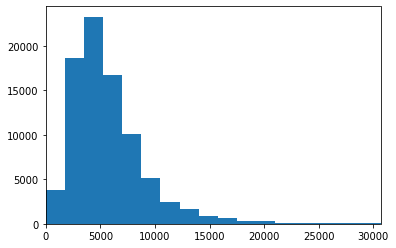

In [80]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);

Observation 3:

With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
Distribution of monthly stated income is very awkward: with a lot of outliers and very large range but still it was right skew. The majority of borrowers are employed and all other categories as small part of borrowers and most of the loans in the data set are actually current loans.

Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [81]:
#I'm just adjusting the form of data
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

# After transforming dataset we have 19664 completed loans and 6341 defaulted.

In [82]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categories, axis=1)
target_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

Variable Listing Category is set up as numeric and most of the values have very low frequency, for the easier visualization so we have change it to categorical and reduce the number of categories.

# Status and Prosper Rating

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

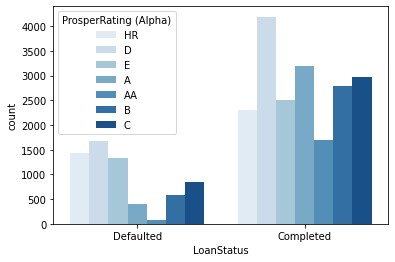

In [83]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')

Observation 1:

The most frequent rating among defaulted loans is actually D.
And the most frequent rating among Completed is alsoDand second highest is A and so on.

# Credit Start with Listing Category

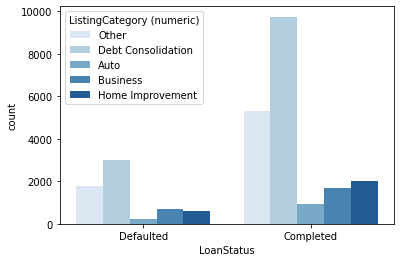

In [84]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Blues');

Observation 2:

In both of the Graphs the debt Consolidation have most frequency among all of them.

# Loan Status and Loan Amount

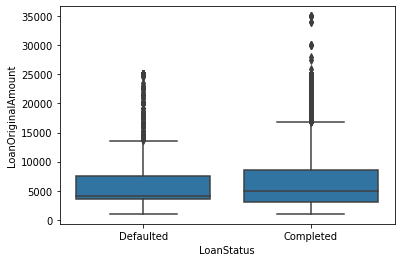

In [85]:
sns.boxplot(data = target_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);

Observation 3:

As from Above Graph we can state that defaulted credits tend to be smaller than completed credits onces.

# Prosper Rating and Employment Status

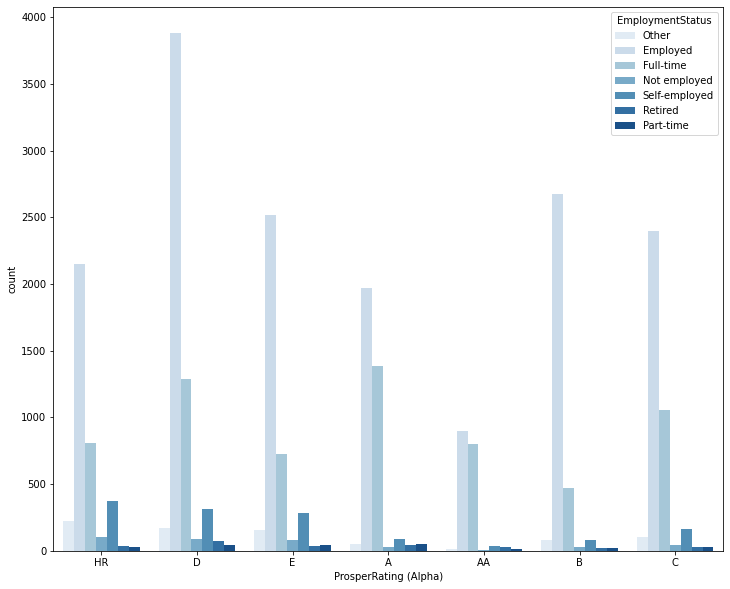

In [86]:
plt.figure(figsize = [12, 10])
sns.countplot(data = target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues');

Observation 4:

Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time.

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
In Loan status vs Loan amount defaulted credits tend to be smaller than completed credits onces. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.

Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Prosper rating D is the most frequent rating among defaulted credits.

# Multivariate Exploration

# Rating, Loan Amount and Loan Status

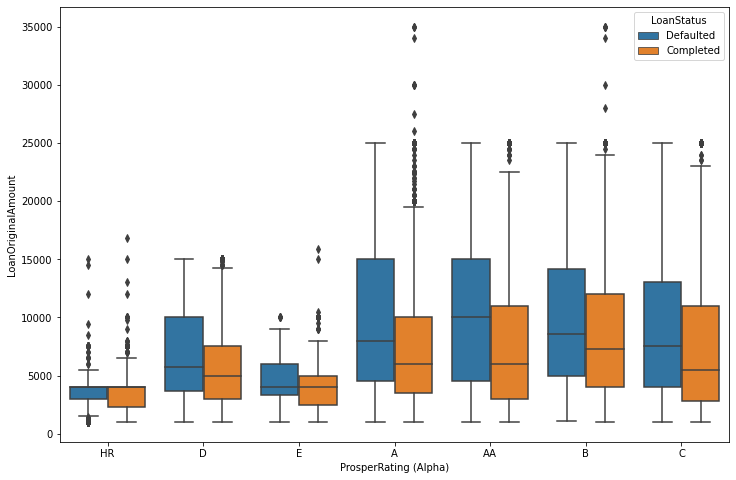

In [87]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

Observation 1:

1. Except for the lowest ratings defaulted credits tend to be larger than completed.
2. Most of the defaulted credits comes from individuals with low Prosper rating.

# Relationships between Credit category, Credit rating and outcome of Credit.

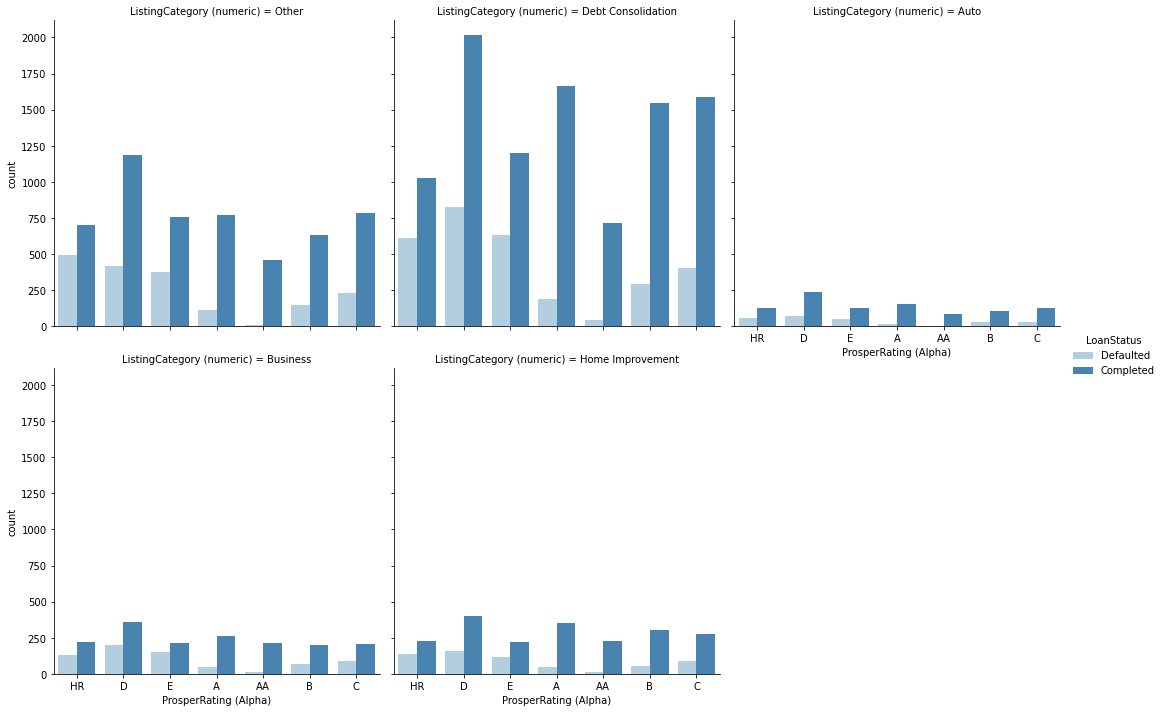

In [88]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = target_df, kind = 'count', palette = 'Blues', col_wrap = 3);

Observation 2:

1. There are 5 graphs in the second one has much up and downs in it other than all of them.
2. There is no substantial difference for default rates in different categories broken up by ratings.

# Amount, Listing Category Loan and Loan Status Interact

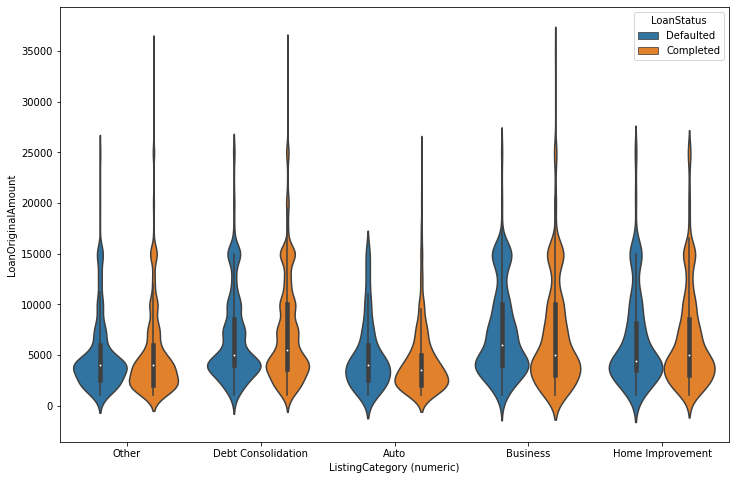

In [89]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=target_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

Observation 3:

1. Except for Auto, Business and Home Improvemrnt do not have nearly equal mean among all of them.
2. Business category tend to have larger amount.

TypeError: '<=' not supported between instances of 'float' and 'str'

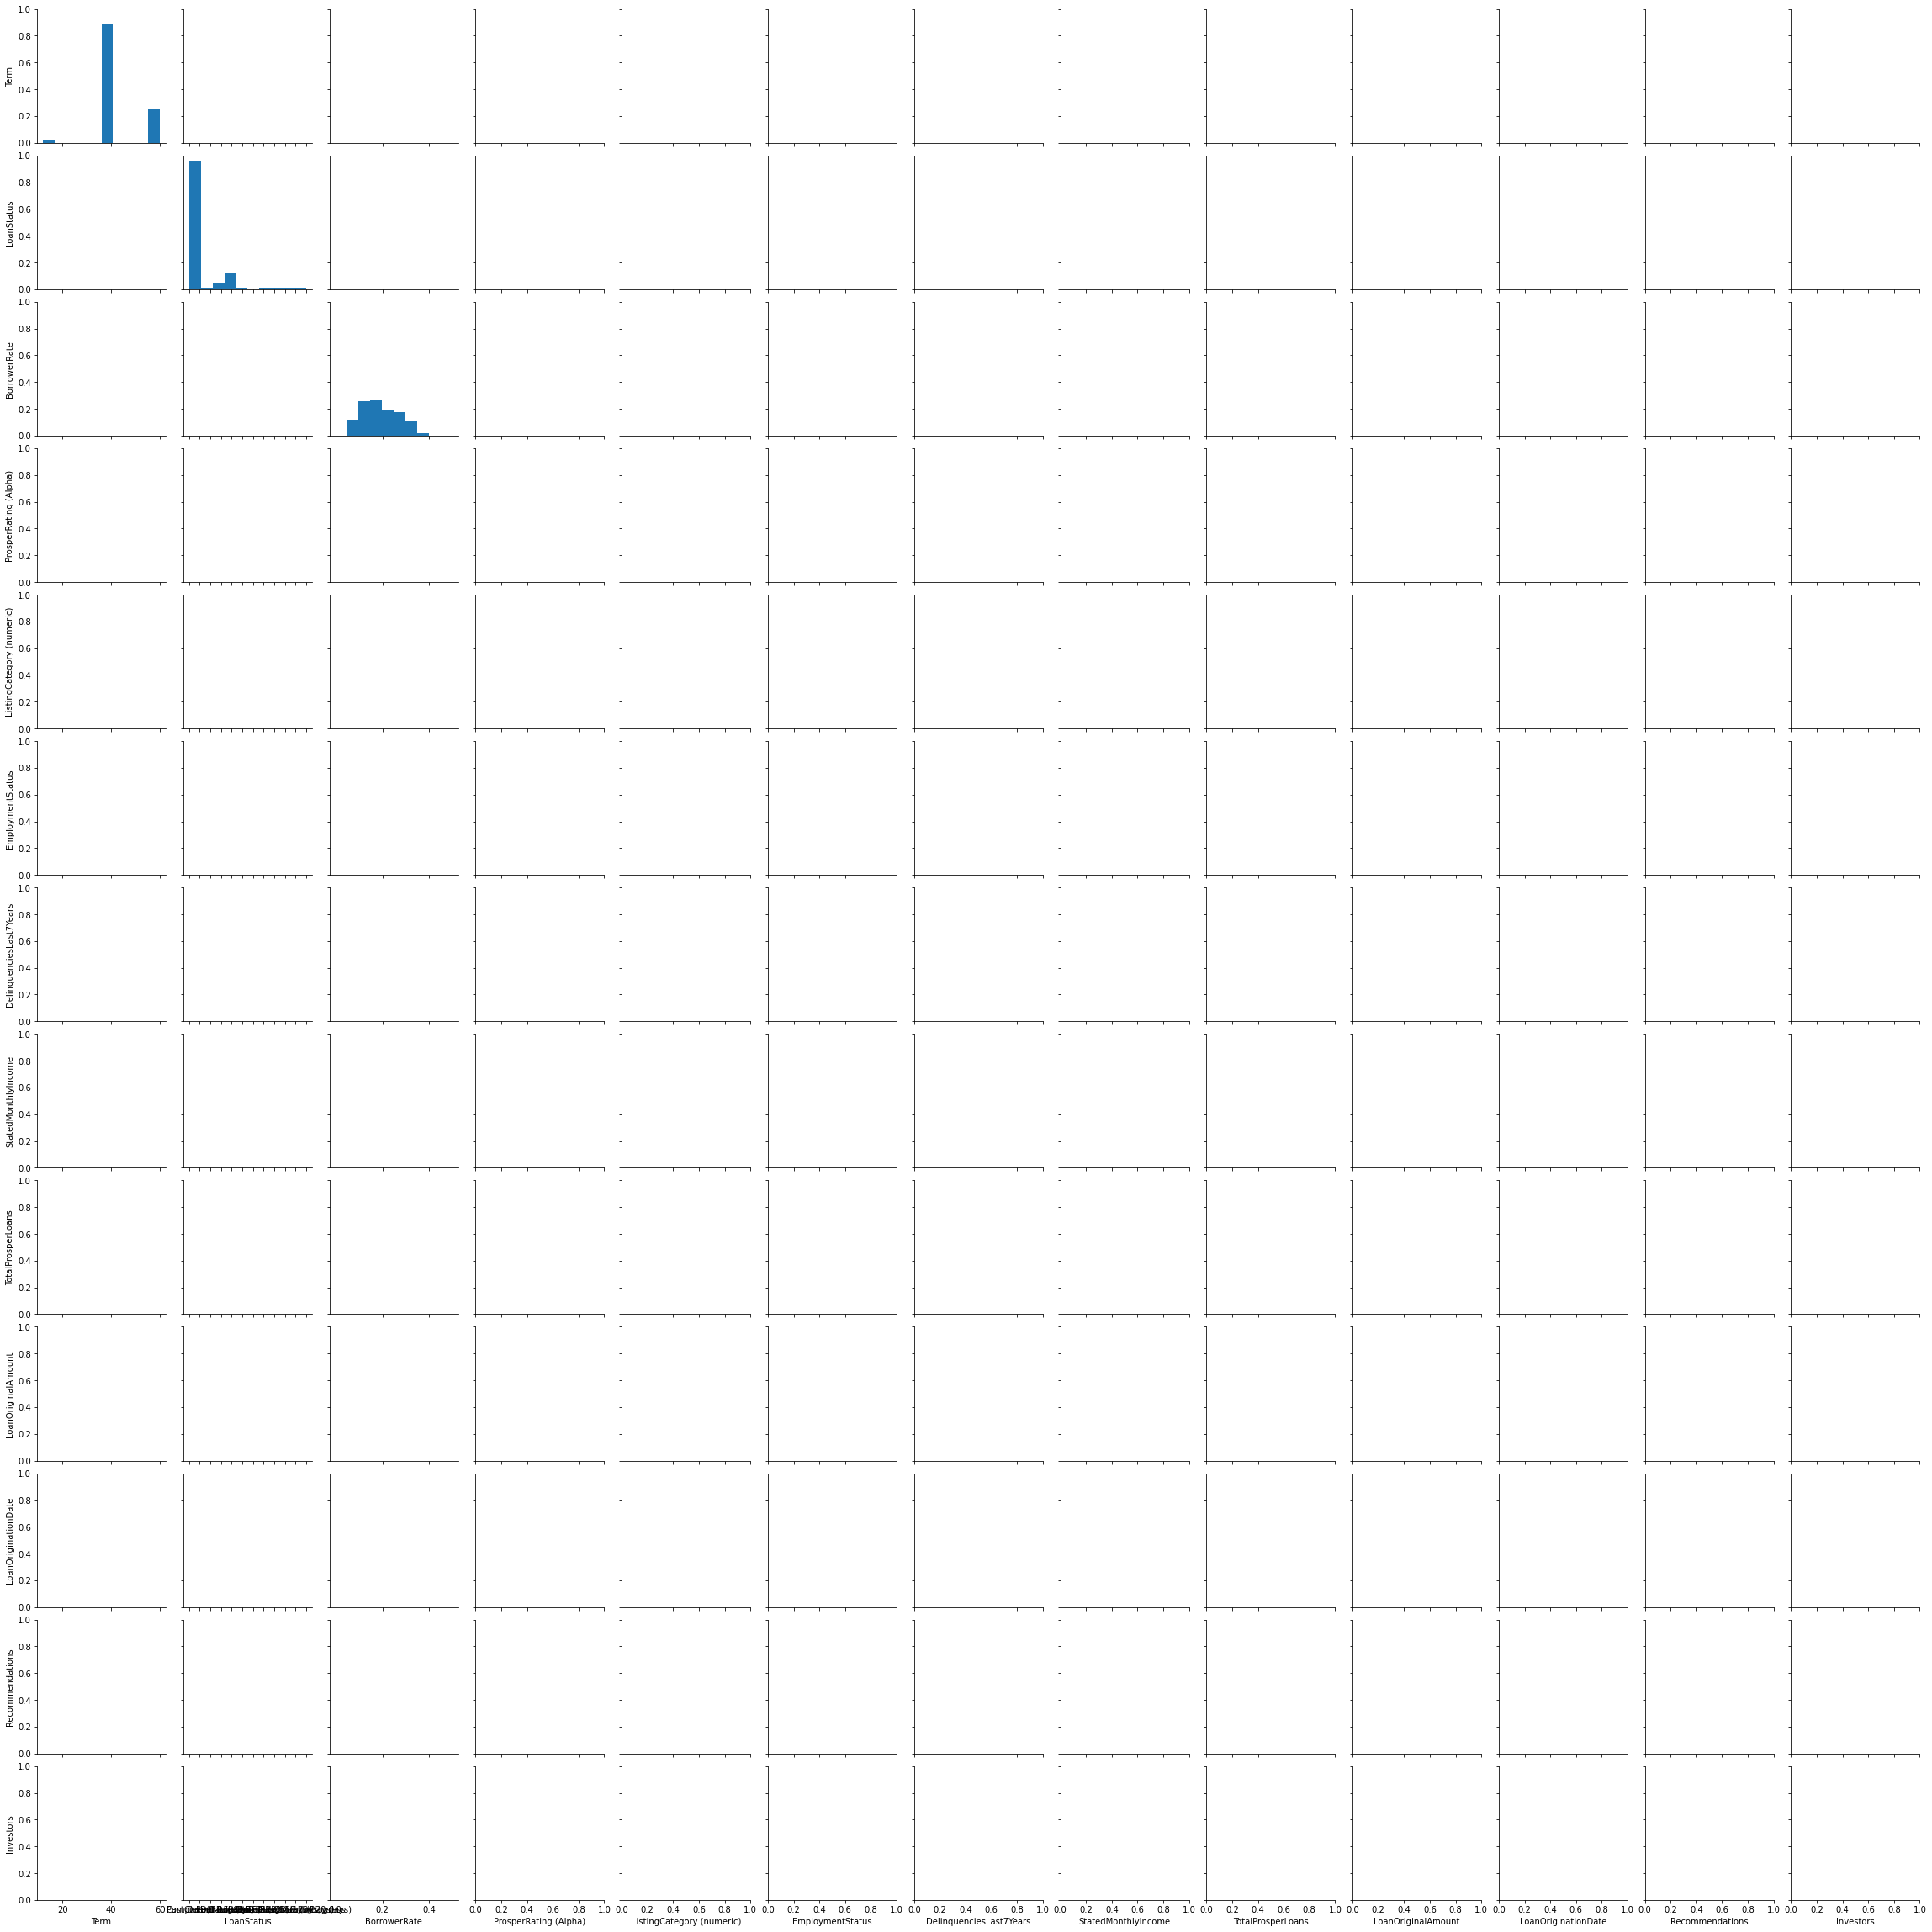

In [90]:
general_vis = sns.PairGrid(data = df, vars = [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'])
general_vis.map_diag(plt.hist)
general_vis.map_offdiag(plt.scatter)

<AxesSubplot:>

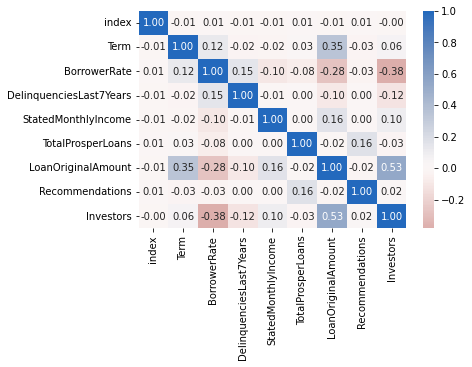

In [91]:
sns.heatmap(target_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Our initial assumptions were strengthened. Most of the defaulted credits comes from individuals with low Prosper rating and Business category tend to have larger amount.

# Were there any interesting or surprising interactions between features?
Interesting finding was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

